# Approved Building Permits Dataset

The Approved Building Permits (ABP) dataset contains information on building permits issued across Boston from 2010 to 2024. It provide insights into city maintenance and development patterns. More information can be found via the following link: https://data.boston.gov/dataset/approved-building-permits. 

In this notebook, we will... 
- Clean and pre-process the dataset
- Conduct base analysis on the dataset 
- Gather useful insights on permits in District 7 from 2014 to 2024 

We will gather two key insights: 
- The distribution of permits by work and occupancy types over time 
- The distribution of permits by declared valuation over time 

### 1. Load Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Dataset

To start with, we load the ABP dataset from GitHub repository to make sure the notebook is reproducible for others. 

In [2]:
df = pd.read_csv("../data/d7-approved-building-permit-new.csv", low_memory=False)

In [3]:
df

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,city,state,zip,property_id,parcel_id,gpsy,gpsx,y_latitude,x_longitude,is_d7
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,...,Boston,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467910,42.359190,-71.052924,False
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$29.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,...,West Roxbury,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119617,42.260750,-71.149611,False
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,...,Charlestown,MA,02129,113443.0,2.028370e+08,2.962078e+06,775710.380595,42.375243,-71.057585,False
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,...,Roxbury,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312667,42.340600,-71.080251,True
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$182.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,...,Brighton,MA,02135,149852.0,2.204944e+09,2.950791e+06,749690.298777,42.344600,-71.154051,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666227,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,Christine McMahon,$0.00,$50.00,2019-09-25 15:36:11+00,2020-03-25 04:00:00+00,...,Boston,MA,02114,154961.0,3.027170e+08,2.956658e+06,774864.862273,42.360383,-71.060818,False
666228,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...,Regina Olivieri,"$1,000.00",$53.00,2019-09-12 17:07:00+00,2020-03-12 04:00:00+00,...,Allston,MA,02134,424193.0,2.101574e+09,2.952823e+06,756414.438216,42.350100,-71.129145,False
666229,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...,Maria Dubrowski,"$2,700.00",$53.00,2012-05-30 18:28:59+00,2012-11-30 05:00:00+00,...,Jamaica Plain,MA,02130,24047.0,1.901861e+09,2.939398e+06,759722.466377,42.313220,-71.117131,False
666230,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,Cesar DaSilva,"$7,000.00",$53.00,2023-04-10 15:10:24+00,2023-10-10 04:00:00+00,...,Dorchester,MA,02124,34863.0,1.701519e+09,2.931227e+06,771088.017082,42.290650,-71.075261,False


### 3. Data Cleaning 

Then, we clean the dataset to make it easier for visualization in the notebook and on Looker Studio. 

We noticed that the variables worktype, permittypedescr, description, and comments are fundamentally describing the permit work types in similar ways. As the permittypedescr, description, and comments are too detailed for analysis, we decide to focus on worktype. But because worktype has 65 distinct values, we group them into 9 major categories to form a better understanding. 

In [4]:
worktype_mapping = {
    'INTEXT': 'Renovation & Interior/Exterior Work',
    'INTREN': 'Renovation & Interior/Exterior Work',
    'EXTREN': 'Renovation & Interior/Exterior Work',
    'OTHER': 'Miscellaneous',
    'SPRINK': 'Fire Protection & Safety',
    'ADDITION': 'Renovation & Interior/Exterior Work',
    'COB': 'Miscellaneous',
    'FA': 'Fire Protection & Safety',
    'ERECT': 'Construction & New Installations',
    'SITE': 'Temporary Structures & Events',
    'VIOL': 'Miscellaneous',
    'PLUMBING': 'Electrical, Plumbing & Utility Systems',
    'SPCEVE': 'Temporary Structures & Events',
    'NEWCON': 'Construction & New Installations',
    'SIGNES': 'Signage & Canopy',
    'SPRNK9': 'Fire Protection & Safety',
    'EXTDEM': 'Demolition',
    'SD': 'Miscellaneous',
    'ROOF': 'Renovation & Interior/Exterior Work',
    'GARAGE': 'Construction & New Installations',
    'AWNING': 'Signage & Canopy',
    'FENCE2': 'Renovation & Interior/Exterior Work',
    'INSUL': 'Renovation & Interior/Exterior Work',
    'SIGNS': 'Signage & Canopy',
    'FSTTRK': 'Temporary Structures & Events',
    'CHGOCC': 'Occupancy & Use Change',
    'CELL': 'Temporary Structures & Events',
    'NROCC': 'Miscellaneous',
    'SOL': 'Construction & New Installations',
    'INTDEM': 'Demolition',
    'SPFT': 'Miscellaneous',
    'RAZE': 'Demolition',
    'TMPSER': 'Temporary Structures & Events',
    'ELECTRICAL': 'Electrical, Plumbing & Utility Systems',
    'GEN': 'Electrical, Plumbing & Utility Systems',
    'CANP': 'Signage & Canopy',
    'FENCE': 'Renovation & Interior/Exterior Work',
    'SIDE': 'Renovation & Interior/Exterior Work',
    'HOLVEN': 'Miscellaneous',
    'CONVRT': 'Miscellaneous',
    'SRVCHG': 'Electrical, Plumbing & Utility Systems',
    'LVOLT': 'Electrical, Plumbing & Utility Systems',
    'MAINT': 'Miscellaneous',
    'Service': 'Miscellaneous',
    'DRIVE': 'Construction & New Installations',
    'INDBLR': 'Electrical, Plumbing & Utility Systems',
    'TEMTRL': 'Temporary Structures & Events',
    'FLAM': 'Fire Protection & Safety',
    'COMPAR': 'Miscellaneous',
    'TVTRK': 'Temporary Structures & Events',
    'New': 'Construction & New Installations',
    'GAS': 'Electrical, Plumbing & Utility Systems',
    'INDFUR': 'Electrical, Plumbing & Utility Systems',
    'AWNRNW': 'Signage & Canopy',
    'RNWSIG': 'Signage & Canopy',
    'RESPAR': 'Miscellaneous',
    'AWNRET': 'Signage & Canopy',
    'BFCHMINFIN': 'Miscellaneous',
    'BFCHMTENT': 'Temporary Structures & Events',
    'General': 'Miscellaneous',
    'Dumpsters': 'Miscellaneous',
    'TMPUSOC': 'Occupancy & Use Change',
    'OSEAT': 'Temporary Structures & Events',
    'CANPRN': 'Signage & Canopy',
    'TCOO': 'Temporary Structures & Events'
}

df['new_worktype'] = df['worktype'].map(worktype_mapping)

df


,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,state,zip,property_id,parcel_id,gpsy,gpsx,y_latitude,x_longitude,is_d7,new_worktype
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,...,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467910,42.359190,-71.052924,False,Renovation & Interior/Exterior Work
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$29.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,...,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119617,42.260750,-71.149611,False,Miscellaneous
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,...,MA,02129,113443.0,2.028370e+08,2.962078e+06,775710.380595,42.375243,-71.057585,False,Miscellaneous
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,...,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312667,42.340600,-71.080251,True,Renovation & Interior/Exterior Work
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$182.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,...,MA,02135,149852.0,2.204944e+09,2.950791e+06,749690.298777,42.344600,-71.154051,False,Renovation & Interior/Exterior Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666227,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,Christine McMahon,$0.00,$50.00,2019-09-25 15:36:11+00,2020-03-25 04:00:00+00,...,MA,02114,154961.0,3.027170e+08,2.956658e+06,774864.862273,42.360383,-71.060818,False,Temporary Structures & Events
666228,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...,Regina Olivieri,"$1,000.00",$53.00,2019-09-12 17:07:00+00,2020-03-12 04:00:00+00,...,MA,02134,424193.0,2.101574e+09,2.952823e+06,756414.438216,42.350100,-71.129145,False,Temporary Structures & Events
666229,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...,Maria Dubrowski,"$2,700.00",$53.00,2012-05-30 18:28:59+00,2012-11-30 05:00:00+00,...,MA,02130,24047.0,1.901861e+09,2.939398e+06,759722.466377,42.313220,-71.117131,False,Construction & New Installations
666230,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,Cesar DaSilva,"$7,000.00",$53.00,2023-04-10 15:10:24+00,2023-10-10 04:00:00+00,...,MA,02124,34863.0,1.701519e+09,2.931227e+06,771088.017082,42.290650,-71.075261,False,Miscellaneous


We also drop the following irrelevant variables. 

In [5]:
df.drop(columns=['worktype', 'permittypedescr', 'description', 'comments', 'applicant', 
                'property_id', 'parcel_id', 'gpsy', 'gpsx'], inplace=True)

The variables declared_valuation and total_fees' formats need to be transformed into numerical values. 

In [6]:
df['declared_valuation'] = df['declared_valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['total_fees'] = df['total_fees'].replace({'\$': '', ',': ''}, regex=True).astype(float)

worktype_value_df = df.groupby('new_worktype')[['declared_valuation', 'total_fees']].sum().reset_index()

worktype_value_df['declared_valuation'] = worktype_value_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
worktype_value_df['total_fees'] = worktype_value_df['total_fees'].apply(lambda x: f"${x:,.2f}")

worktype_value_df

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_31491/309331977.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['declared_valuation'] = df['declared_valuation'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_31491/309331977.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['total_fees'] = df['total_fees'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,new_worktype,declared_valuation,total_fees
0,Construction & New Installations,"$85,347,198,595.03","$405,278,004.41"
1,Demolition,"$907,490,888.92","$8,223,113.77"
2,"Electrical, Plumbing & Utility Systems","$20,125,912,787.24","$49,909,448.71"
3,Fire Protection & Safety,"$946,168,047.52","$10,629,635.12"
4,Miscellaneous,"$12,168,629,014.68","$24,678,870.93"
5,Occupancy & Use Change,"$10,532,113,405.59","$58,478,401.16"
6,Renovation & Interior/Exterior Work,"$38,829,953,439.84","$272,958,222.18"
7,Signage & Canopy,"$89,888,689.16","$1,204,245.83"
8,Temporary Structures & Events,"$15,932,988,719.91","$99,302,730.99"


For variables issued_date and expiration_date, we only keep year and month and remove date and time. We also make a new column issued_year to only display the year. 

In [ ]:
df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce', format='mixed').dt.to_period('M')
df['expiration_date'] = pd.to_datetime(df['expiration_date'], errors='coerce', format='mixed').dt.to_period('M')
df['issued_year'] = df['issued_date'].dt.year

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_31491/1827299841.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce', format='mixed').dt.to_period('M')
/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_31491/1827299841.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['expiration_date'] = pd.to_datetime(df['expiration_date'], errors='coerce', format='mixed').dt.to_period('M')


In [8]:
value_by_year_df = df.groupby(['new_worktype', 'issued_year'])[['declared_valuation', 'total_fees']].sum().reset_index()

value_by_year_df['declared_valuation'] = value_by_year_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
value_by_year_df['total_fees'] = value_by_year_df['total_fees'].apply(lambda x: f"${x:,.2f}")

value_by_year_df

,new_worktype,issued_year,declared_valuation,total_fees
0,Construction & New Installations,2009,"$369,600.00","$1,191.00"
1,Construction & New Installations,2010,"$800,453,763.63","$6,820,305.61"
2,Construction & New Installations,2011,"$1,732,864,017.98","$18,032,674.80"
3,Construction & New Installations,2012,"$1,150,096,899.38","$10,057,526.26"
4,Construction & New Installations,2013,"$3,122,390,290.95","$17,822,323.47"
...,...,...,...,...
141,Temporary Structures & Events,2020,"$945,284,524.61","$4,599,406.45"
142,Temporary Structures & Events,2021,"$675,788,030.88","$4,432,188.63"
143,Temporary Structures & Events,2022,"$1,007,357,971.80","$6,323,973.54"
144,Temporary Structures & Events,2023,"$1,487,870,782.32","$10,290,360.19"


The variable status have 4 values: Open, Closed, Stop Work, and Issued. Since Stop Work and Issued only have 1 value each, they will be dropped. 

In [68]:
df['status'].value_counts()

status
Open      292410
Closed    204657
Name: count, dtype: int64

In [67]:
df = df[~df['status'].isin(['Stop Work', 'Issued'])]

In [69]:
df['status'].value_counts()

status
Open      292410
Closed    204657
Name: count, dtype: int64

There are 17 distinct values under the variable occupancytype. We rename the values as they are not intuitive to understand. 

In [10]:
occupancytype_map = {
    '1-2FAM': '1-2 Family Residential',
    '1-3FAM': '1-3 Family Residential',
    '1-4FAM': '1-4 Family Residential',
    '1-7FAM': '1-7 Family Residential',
    'Multi': 'Multi-family Residential',
    'Comm': 'Commercial',
    'Mixed': 'Residential & Commercial',
    'Other': 'Other',
    '1Unit': 'Single Unit Residential',
    'VacLd': 'Vacant Land',
    '7More': '7 or More Units',
    '3unit': '3 Unit Residential',
    '2unit': '2 Unit Residential',
    '4unit': '4 Unit Residential',
    '6unit': '6 Unit Residential',
    '5unit': '5 Unit Residential',
    '7unit': '7 Unit Residential'
}

df['new_occupancytype'] = df['occupancytype'].map(occupancytype_map)

Since 17 distinct occupancy types can be too detailed, we group them into 6 major categories. 

In [12]:
occupancytype_category_map = {
    'Family Residential': ['1-2 Family Residential', '1-3 Family Residential', '1-4 Family Residential', '1-7 Family Residential', 'Single Unit Residential'],
    'Multi-family Residential': ['Multi-family Residential', '2 Unit Residential', '3 Unit Residential', '4 Unit Residential', '5 Unit Residential', '6 Unit Residential', '7 Unit Residential', '7 or More Units'],
    'Commercial': ['Commercial'],
    'Mixed Use': ['Residential & Commercial'],
    'Vacant Land': ['Vacant Land'],
    'Other': ['Other']
}

def categorize_occupancytype(value):
    for category, types in occupancytype_category_map.items():
        if value in types:
            return category
    return 'Unknown'

df['new_occupancytype_category'] = df['new_occupancytype'].apply(categorize_occupancytype)


We previously turned the ABP dataset into shapefile, and we want to make the variable is_d7 more intuitive for visualization. 

In [14]:
df['district_label'] = df['is_d7'].replace({True: 'District 7', False: 'Boston'})

Based on client's request, we want to take a closer look at the permit trend from 2014 to 2024, so we filter the data. 

In [71]:
df = df[(df['issued_year'] >= 2014) & (df['issued_year'] <= 2024)]

Now, we save the dataset as two versions: 1. Boston as a whole and 2. District 7 only. 

In [72]:
df_d7 = df[df['district_label'] == 'District 7']
df_d7

,permitnumber,declared_valuation,total_fees,issued_date,expiration_date,status,occupancytype,sq_feet,address,city,state,zip,y_latitude,x_longitude,is_d7,new_worktype,issued_year,new_occupancytype,new_occupancytype_category,district_label
3,A1001201,74295.75,803.0,2019-11,2020-05,Closed,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,42.340600,-71.080251,True,Renovation & Interior/Exterior Work,2019,Multi-family Residential,Multi-family Residential,District 7
8,A1002830,0.00,26.0,2019-10,2020-04,Open,1-3FAM,0.0,52 Guild ST,Roxbury,MA,02119,42.327064,-71.089975,True,Renovation & Interior/Exterior Work,2019,1-3 Family Residential,Family Residential,District 7
10,A1003458,1.00,30.0,2021-02,2021-08,Open,1-2FAM,0.0,170 W Brookline ST,Roxbury,MA,02118,42.342600,-71.076191,True,Renovation & Interior/Exterior Work,2021,1-2 Family Residential,Family Residential,District 7
35,A1009433,0.00,29.0,2019-10,2020-04,Open,1-2FAM,0.0,43-45 Forest ST,Roxbury,MA,02119,42.326340,-71.077393,True,Miscellaneous,2019,1-2 Family Residential,Family Residential,District 7
36,A1009433,0.00,29.0,2019-10,2020-04,Open,1-2FAM,0.0,43-45 Forest ST,Roxbury,MA,02119,42.326340,-71.077393,True,Miscellaneous,2019,1-2 Family Residential,Family Residential,District 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666125,U49898417,3200.00,59.0,2019-04,2019-10,Open,1-4FAM,0.0,10 Copeland PK,Roxbury,MA,02119,42.322919,-71.079311,True,Miscellaneous,2019,1-4 Family Residential,Family Residential,District 7
666126,U49898417,3200.00,59.0,2019-04,2019-10,Open,1-4FAM,0.0,10 Copeland PK,Roxbury,MA,02119,42.322919,-71.079311,True,Miscellaneous,2019,1-4 Family Residential,Family Residential,District 7
666138,U49909001,1.00,50.0,2020-01,2020-07,Open,Other,0.0,709 Columbus AV,Boston,MA,02120,42.338409,-71.084875,True,Miscellaneous,2020,Other,Other,District 7
666177,U49935734,20000.00,50.0,2020-01,2020-07,Open,1-3FAM,0.0,5 Carlisle ST,Dorchester,MA,02121,42.314100,-71.082781,True,Miscellaneous,2020,1-3 Family Residential,Family Residential,District 7


In [73]:
df_d7.to_csv("../data/d7-ABP-cleaned.csv", index=False)

In [74]:
df_boston = df[df['district_label'] == 'Boston']
df_boston

,permitnumber,declared_valuation,total_fees,issued_date,expiration_date,status,occupancytype,sq_feet,address,city,state,zip,y_latitude,x_longitude,is_d7,new_worktype,issued_year,new_occupancytype,new_occupancytype_category,district_label
0,A1000569,36500.0,390.0,2021-01,2021-07,Open,Mixed,0.0,181-183 State ST,Boston,MA,02109,42.359190,-71.052924,False,Renovation & Interior/Exterior Work,2021,Residential & Commercial,Mixed Use,Boston
2,A1001012,5000.0,70.0,2020-06,NaT,Open,1-3FAM,0.0,15 Prospect ST,Charlestown,MA,02129,42.375243,-71.057585,False,Miscellaneous,2020,1-3 Family Residential,Family Residential,Boston
5,A1001913,1.0,33.0,2019-10,2020-04,Closed,Comm,0.0,130-140 Brighton AV,Allston,MA,02134,42.352760,-71.131851,False,Renovation & Interior/Exterior Work,2019,Commercial,Commercial,Boston
6,A1002445,50000.0,556.0,2019-11,2020-05,Open,1-2FAM,0.0,7 Amboy ST,Allston,MA,02134,42.359710,-71.124331,False,Renovation & Interior/Exterior Work,2019,1-2 Family Residential,Family Residential,Boston
7,A1002783,0.0,32.0,2019-10,2020-04,Open,Mixed,0.0,50-150 Causeway ST,Boston,MA,02114,42.365645,-71.061655,False,Renovation & Interior/Exterior Work,2019,Residential & Commercial,Mixed Use,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666226,U49993435,0.0,50.0,2019-09,2020-03,Open,Mixed,0.0,3 Center PZ,Boston,MA,02114,42.360383,-71.060818,False,Temporary Structures & Events,2019,Residential & Commercial,Mixed Use,Boston
666227,U49993435,0.0,50.0,2019-09,2020-03,Open,Mixed,0.0,3 Center PZ,Boston,MA,02114,42.360383,-71.060818,False,Temporary Structures & Events,2019,Residential & Commercial,Mixed Use,Boston
666228,U49993492,1000.0,53.0,2019-09,2020-03,Open,Comm,0.0,1188 Commonwealth AV,Allston,MA,02134,42.350100,-71.129145,False,Temporary Structures & Events,2019,Commercial,Commercial,Boston
666230,U49996367,7000.0,53.0,2023-04,2023-10,Open,1-3FAM,0.0,16 Colonial AVE,Dorchester,MA,02124,42.290650,-71.075261,False,Miscellaneous,2023,1-3 Family Residential,Family Residential,Boston


In [75]:
df_boston.to_csv("../data/boston-ABP-cleaned.csv", index=False)

## Data Visualization

#### Total Permit Count by Work Types in Boston (2014-2024)

<Figure size 2000x1000 with 0 Axes>

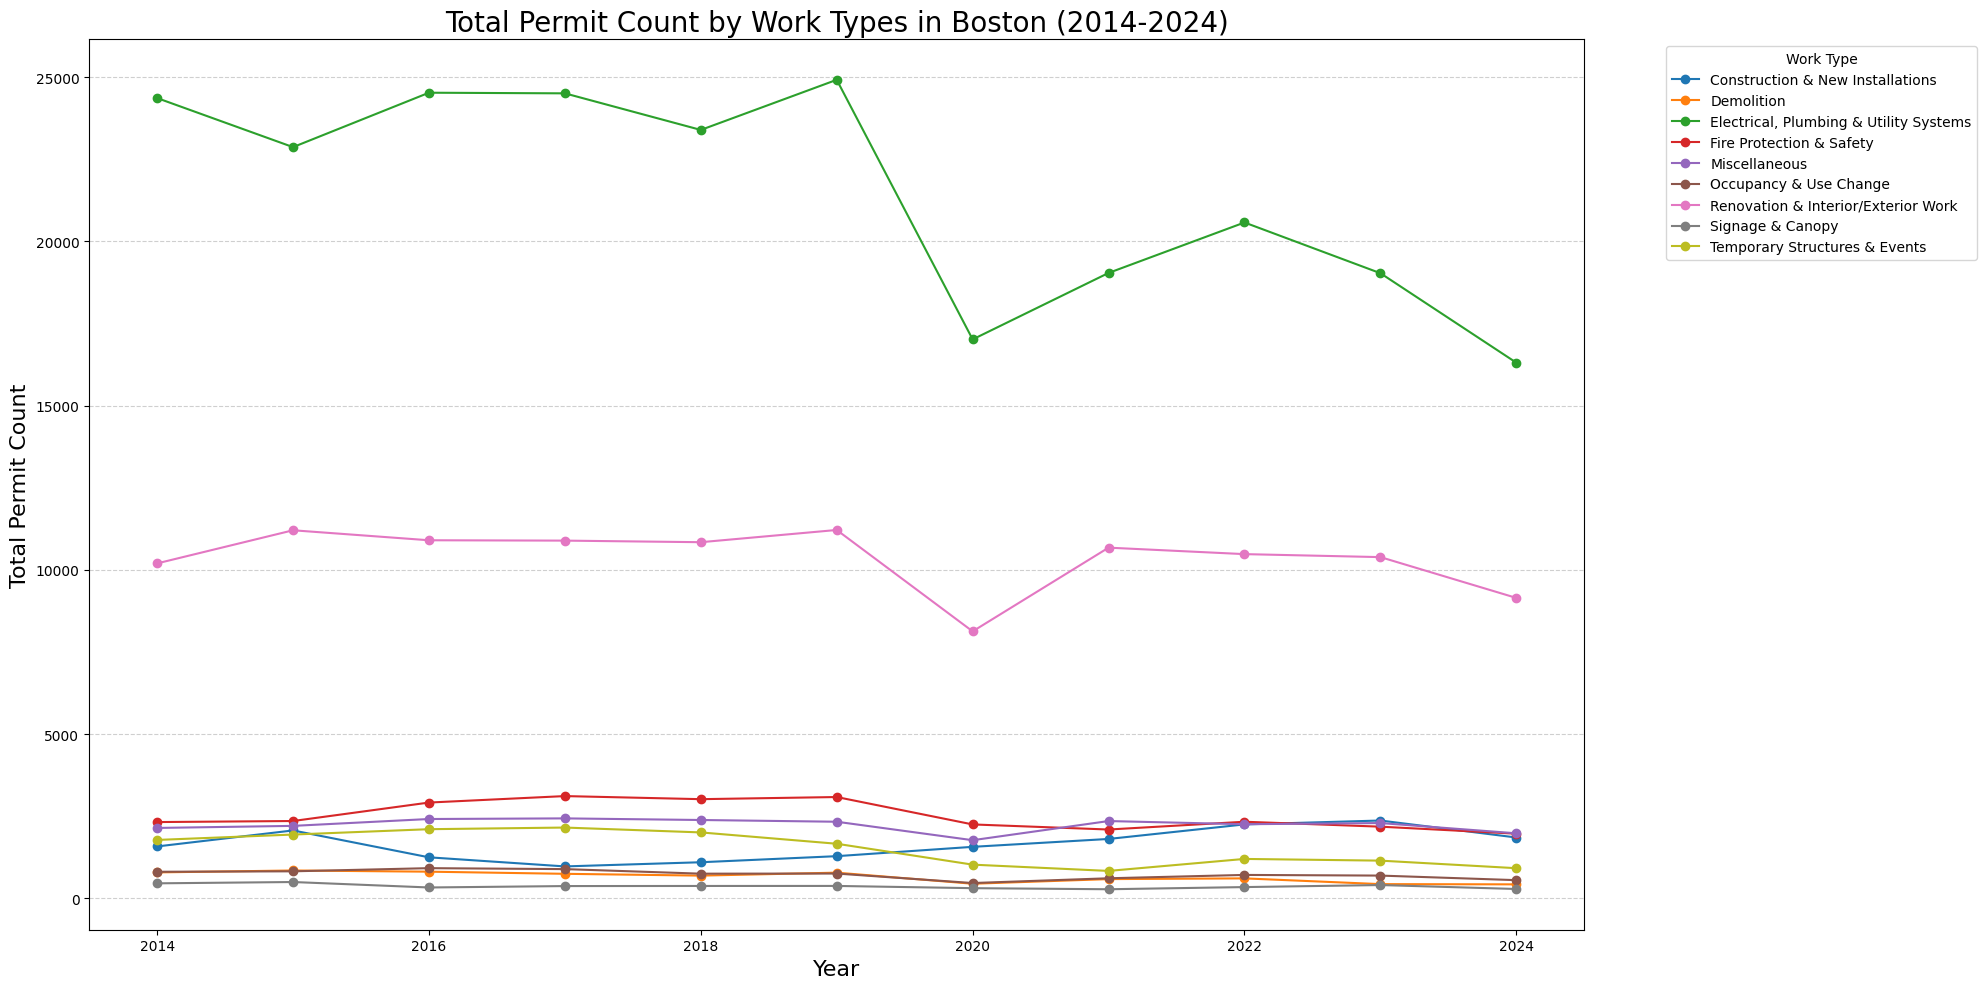

In [41]:
worktype_count = df_boston.groupby(['issued_year', 'new_worktype']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
worktype_count.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Work Types in Boston (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Total Permit Count by Work Types in District 7 (2014-2024)

<Figure size 2000x1000 with 0 Axes>

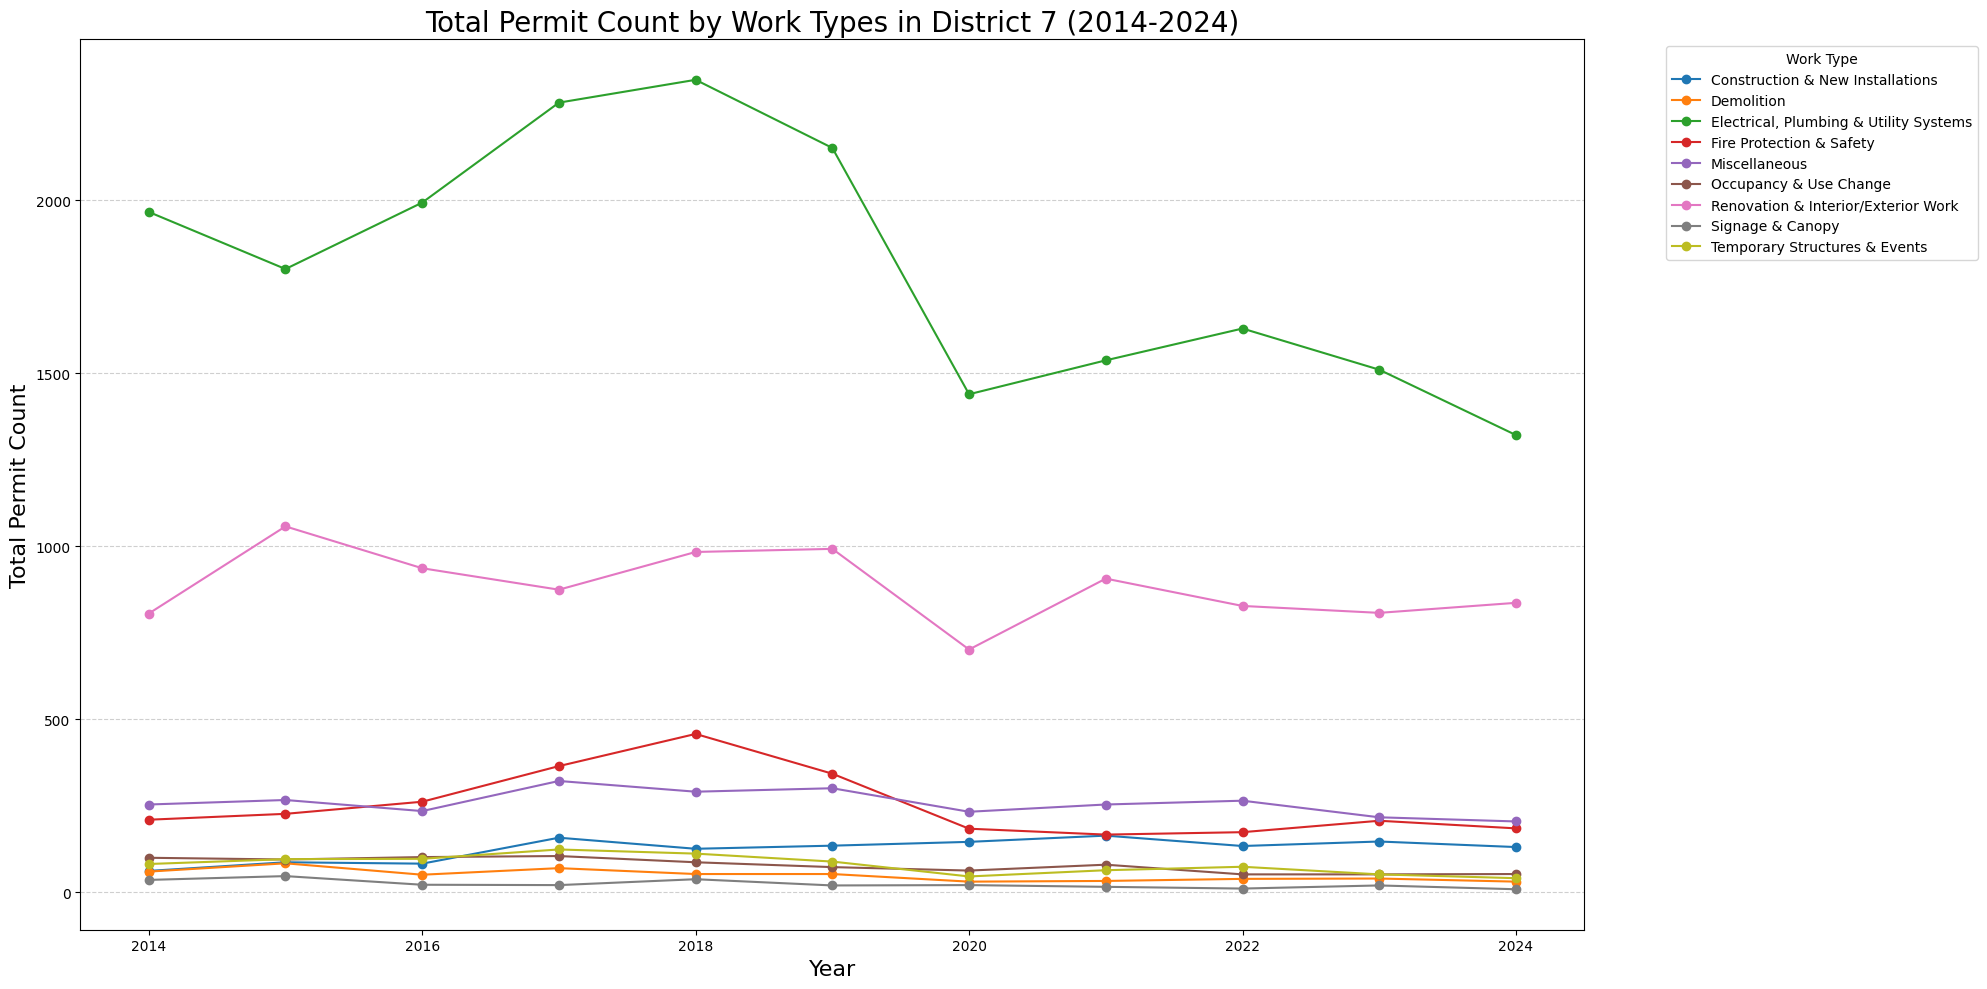

In [42]:
worktype_count_d7 = df_d7.groupby(['issued_year', 'new_worktype']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
worktype_count_d7.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Work Types in District 7 (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Findings**: 
- Boston and District 7 share similar patterns in total permit count by work types.
- Electrical, Plumbing & Utility Systems is the most common work type from 2014 to 2024, followed by Renovation and Interior/Exterior Work. 
- The remaining work types stay under 10,000 permits across the years, and are further analyzed in the following graphs. 

#### Percentage of Permits by Grouped Work Types in Boston (2014-2024)

<Figure size 1400x700 with 0 Axes>

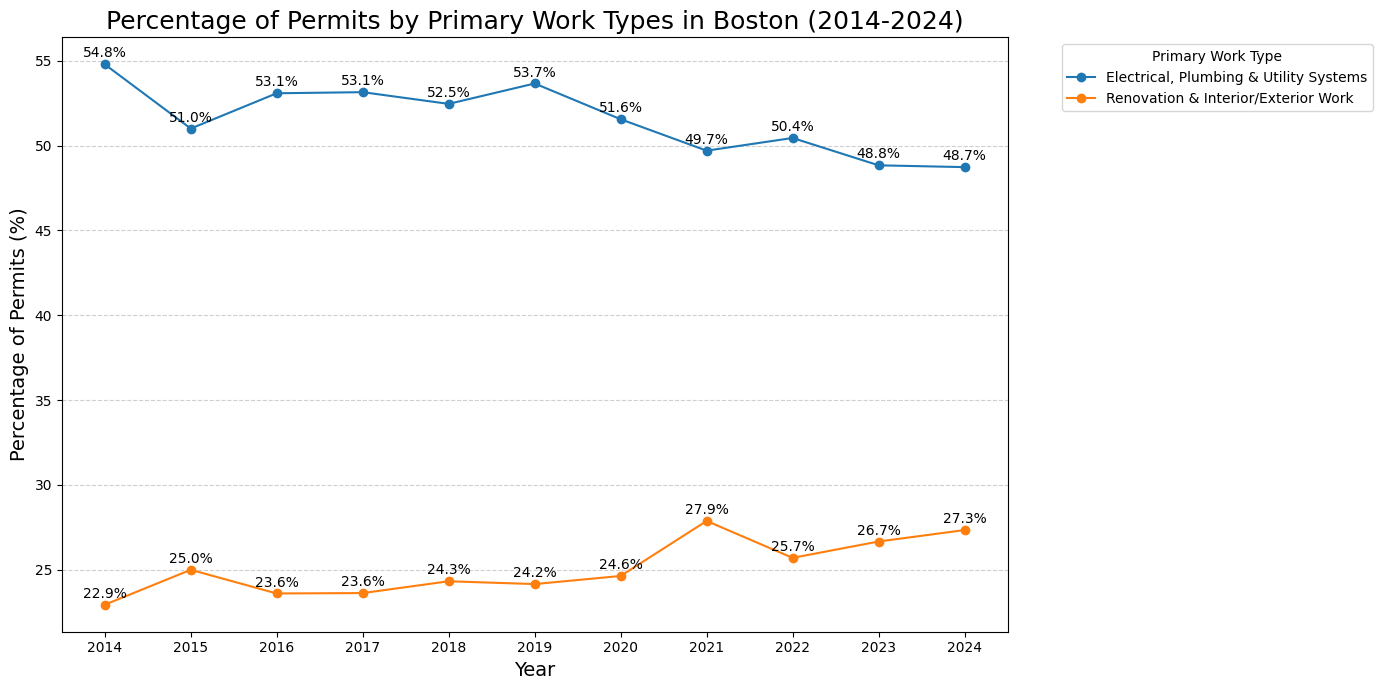

<Figure size 1400x700 with 0 Axes>

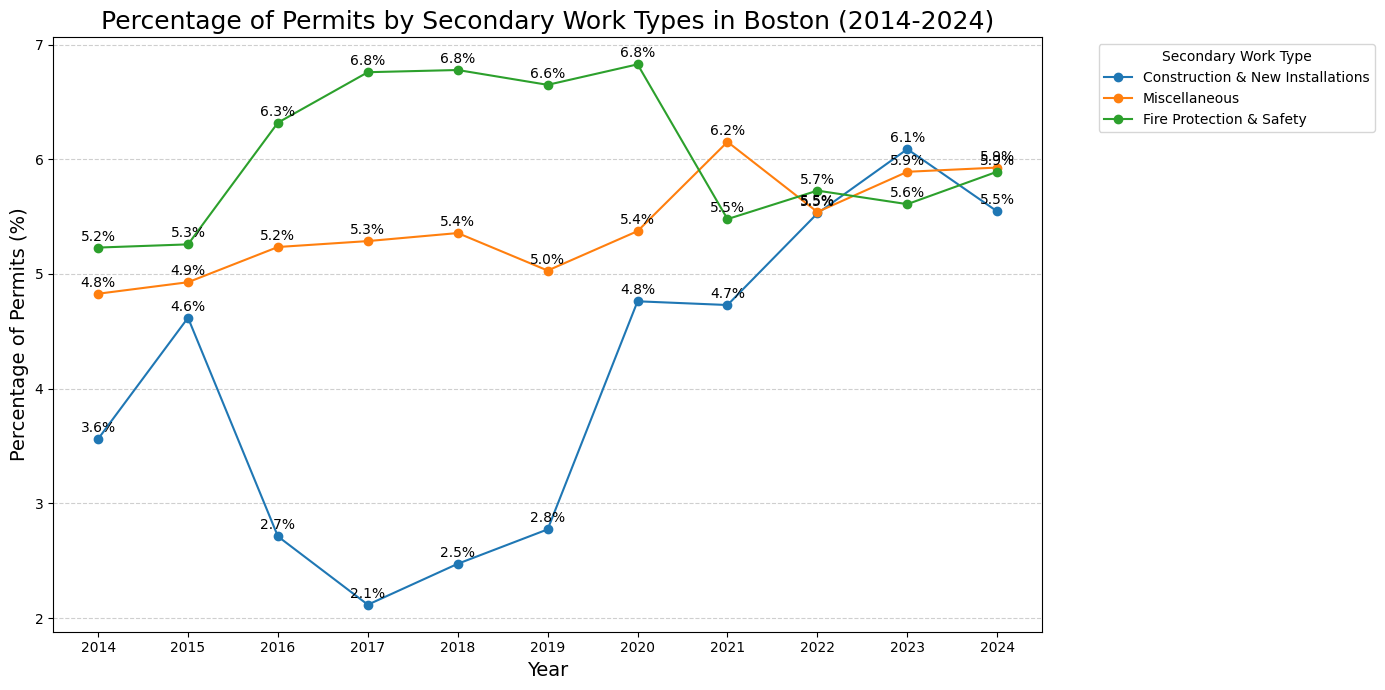

<Figure size 1400x700 with 0 Axes>

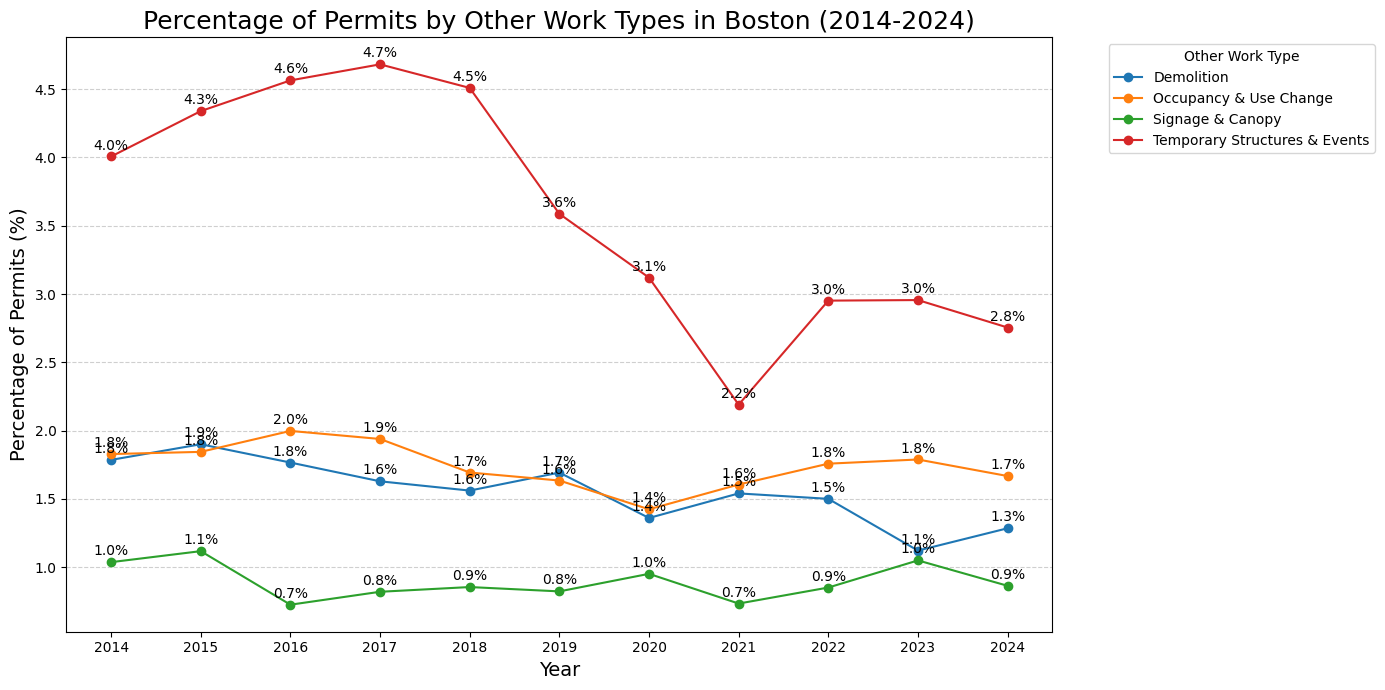

In [43]:
worktype_percent = worktype_count.div(worktype_count.sum(axis=1), axis=0) * 100

primary_worktype = ['Electrical, Plumbing & Utility Systems', 'Renovation & Interior/Exterior Work']
secondary_worktype = ['Construction & New Installations', 'Miscellaneous', 'Fire Protection & Safety']

primary_worktype_data = worktype_percent[primary_worktype]
secondary_worktype_data = worktype_percent[secondary_worktype]
other_worktype_data = worktype_percent.drop(columns=primary_worktype + secondary_worktype)

plt.figure(figsize=(14, 7))
ax1 = primary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax1.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax1.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Primary Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=primary_worktype_data.index, labels=primary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Primary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax2 = secondary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax2.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Secondary Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=secondary_worktype_data.index, labels=secondary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Secondary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax3 = other_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax3.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Other Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=other_worktype_data.index, labels=other_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Other Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Percentage of Permits by Grouped Work Types in District 7 (2014-2024)

<Figure size 1400x700 with 0 Axes>

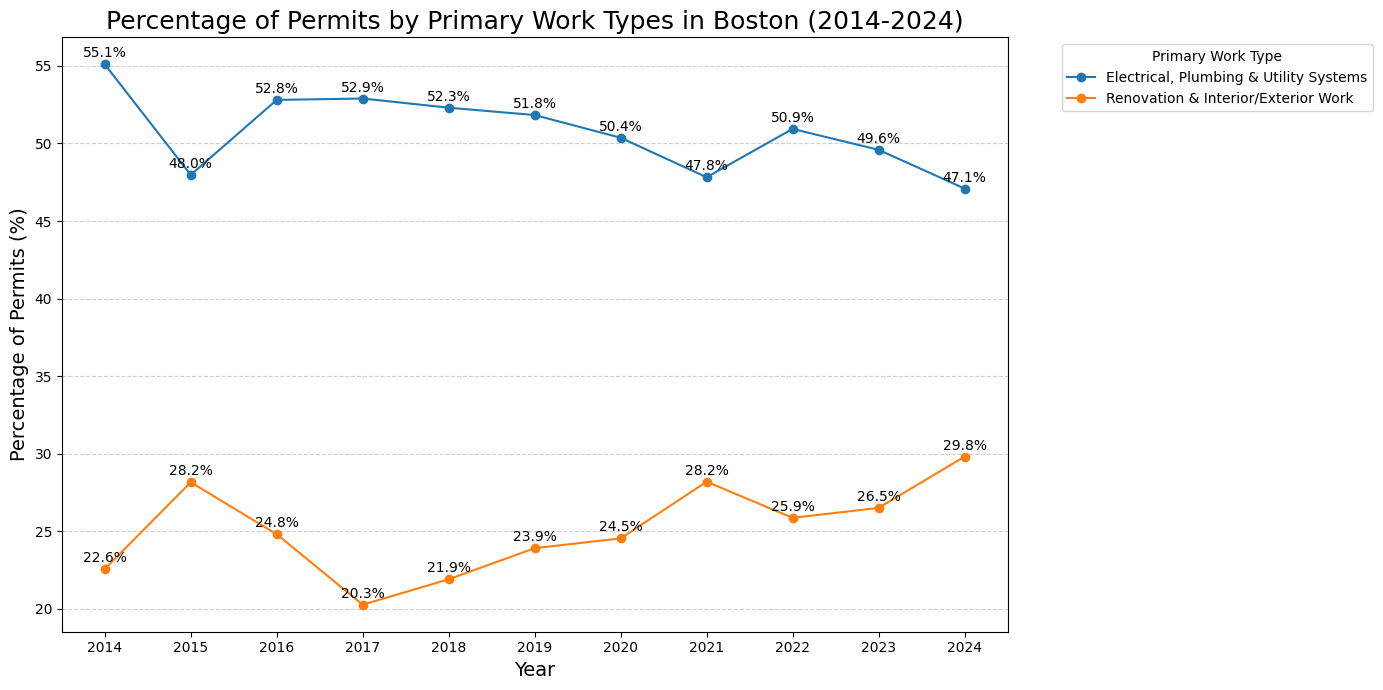

<Figure size 1400x700 with 0 Axes>

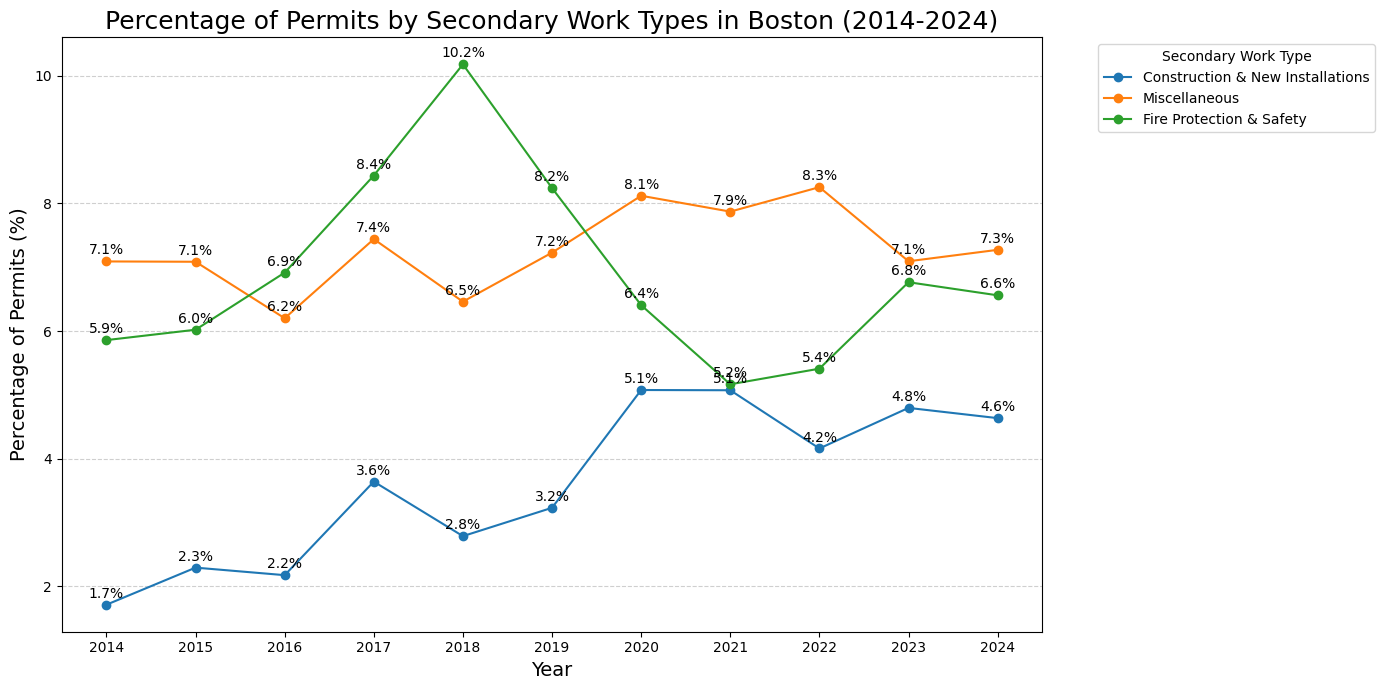

<Figure size 1400x700 with 0 Axes>

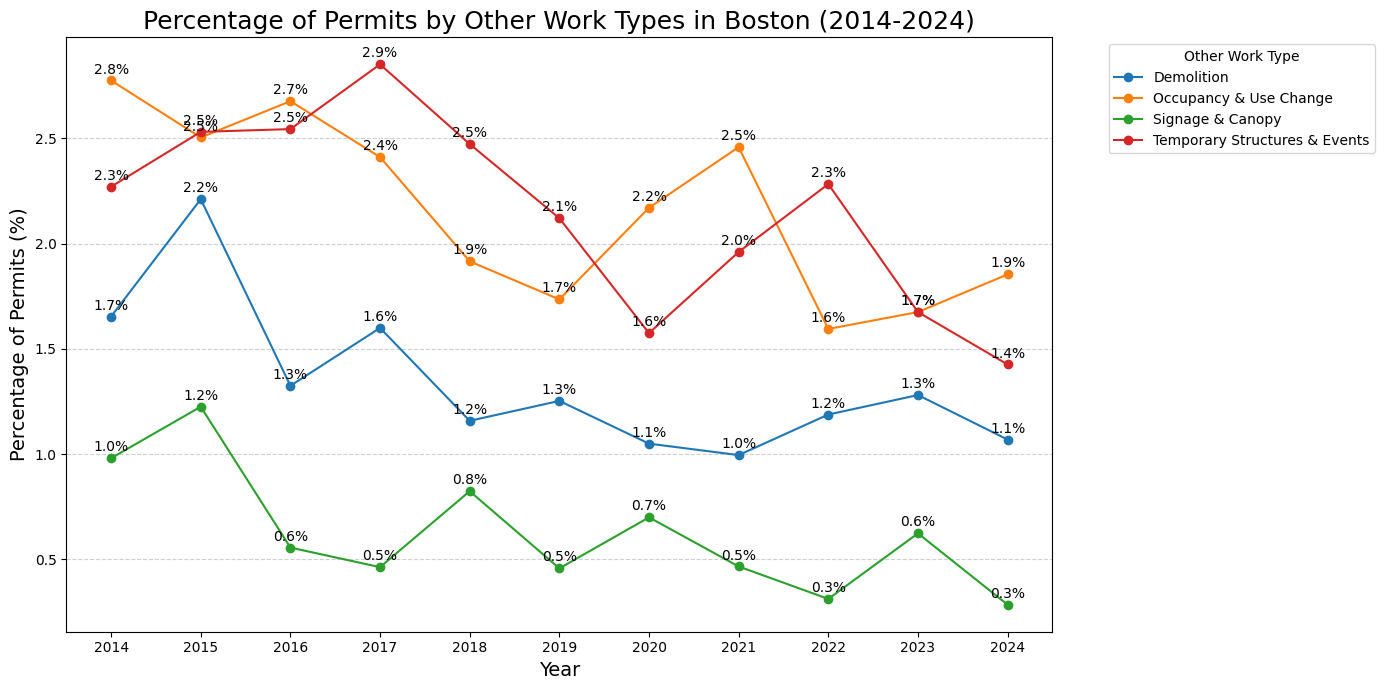

In [ ]:
worktype_percent = worktype_count_d7.div(worktype_count_d7.sum(axis=1), axis=0) * 100

primary_worktype = ['Electrical, Plumbing & Utility Systems', 'Renovation & Interior/Exterior Work']
secondary_worktype = ['Construction & New Installations', 'Miscellaneous', 'Fire Protection & Safety']

primary_worktype_data = worktype_percent[primary_worktype]
secondary_worktype_data = worktype_percent[secondary_worktype]
other_worktype_data = worktype_percent.drop(columns=primary_worktype + secondary_worktype)

plt.figure(figsize=(14, 7))
ax1 = primary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax1.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax1.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Primary Work Types in D7 (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=primary_worktype_data.index, labels=primary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Primary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax2 = secondary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax2.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Secondary Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=secondary_worktype_data.index, labels=secondary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Secondary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax3 = other_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax3.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Other Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=other_worktype_data.index, labels=other_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Other Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Findings**: 
- The percentage for Electrical, Plumbing, and Utility Systems was generally decreasing, while Renovation and Interior/Exterior Work was slowly increasing. 
- Both work types took up around 78% of total permits. 
- The demands for Construction and New Installations as well as Fire Protection and Safety fluctuated significantly, while Miscellaneous is  generally stable. 
- Demolition, Occupancy and Use Change, Temporary Structures and Events, as well as Signade and Canopy appears to be under control, given their low percentages and relatively even patterns. 

#### Total Permit Count by Occupancy Types in Boston (2014-2024)

<Figure size 2000x1000 with 0 Axes>

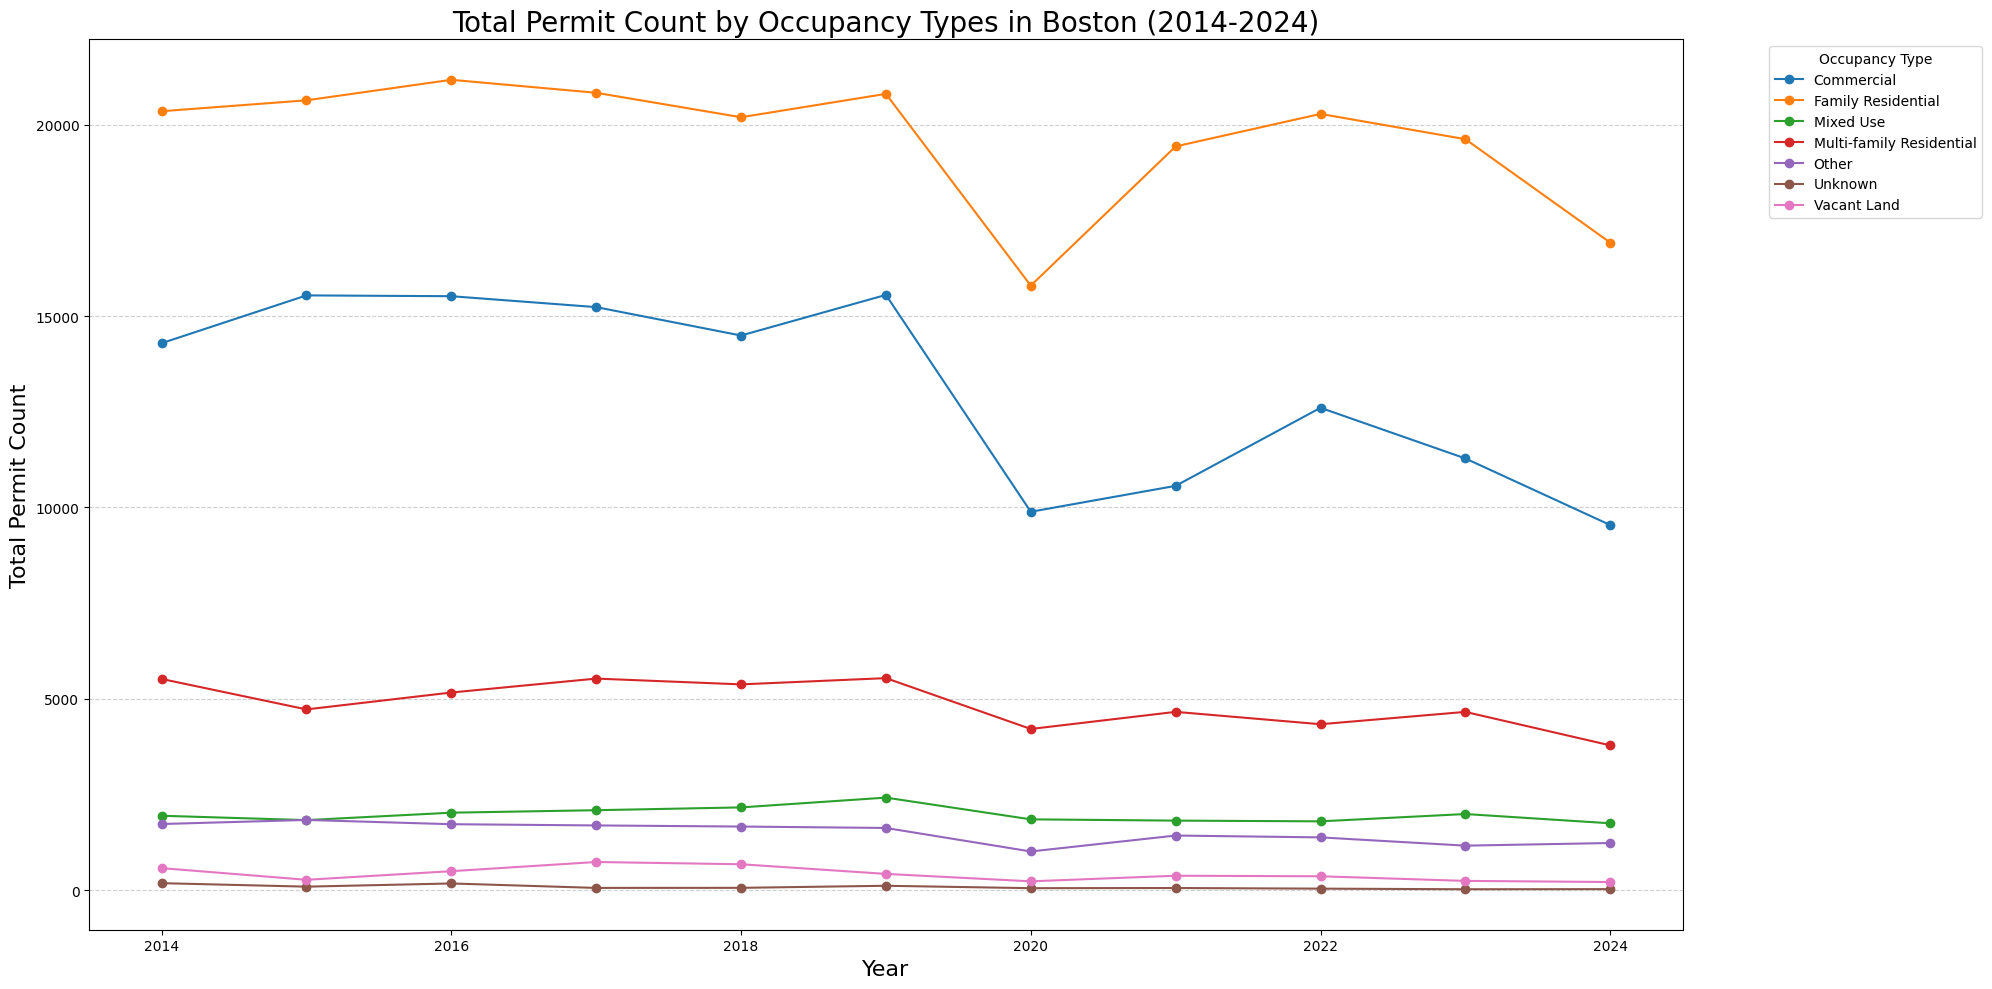

In [48]:
occupancytype_count = df_boston.groupby(['issued_year', 'new_occupancytype_category']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
occupancytype_count.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Occupancy Types in Boston (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Total Permit Count by Occupancy Types in District 7 (2014-2024)

<Figure size 2000x1000 with 0 Axes>

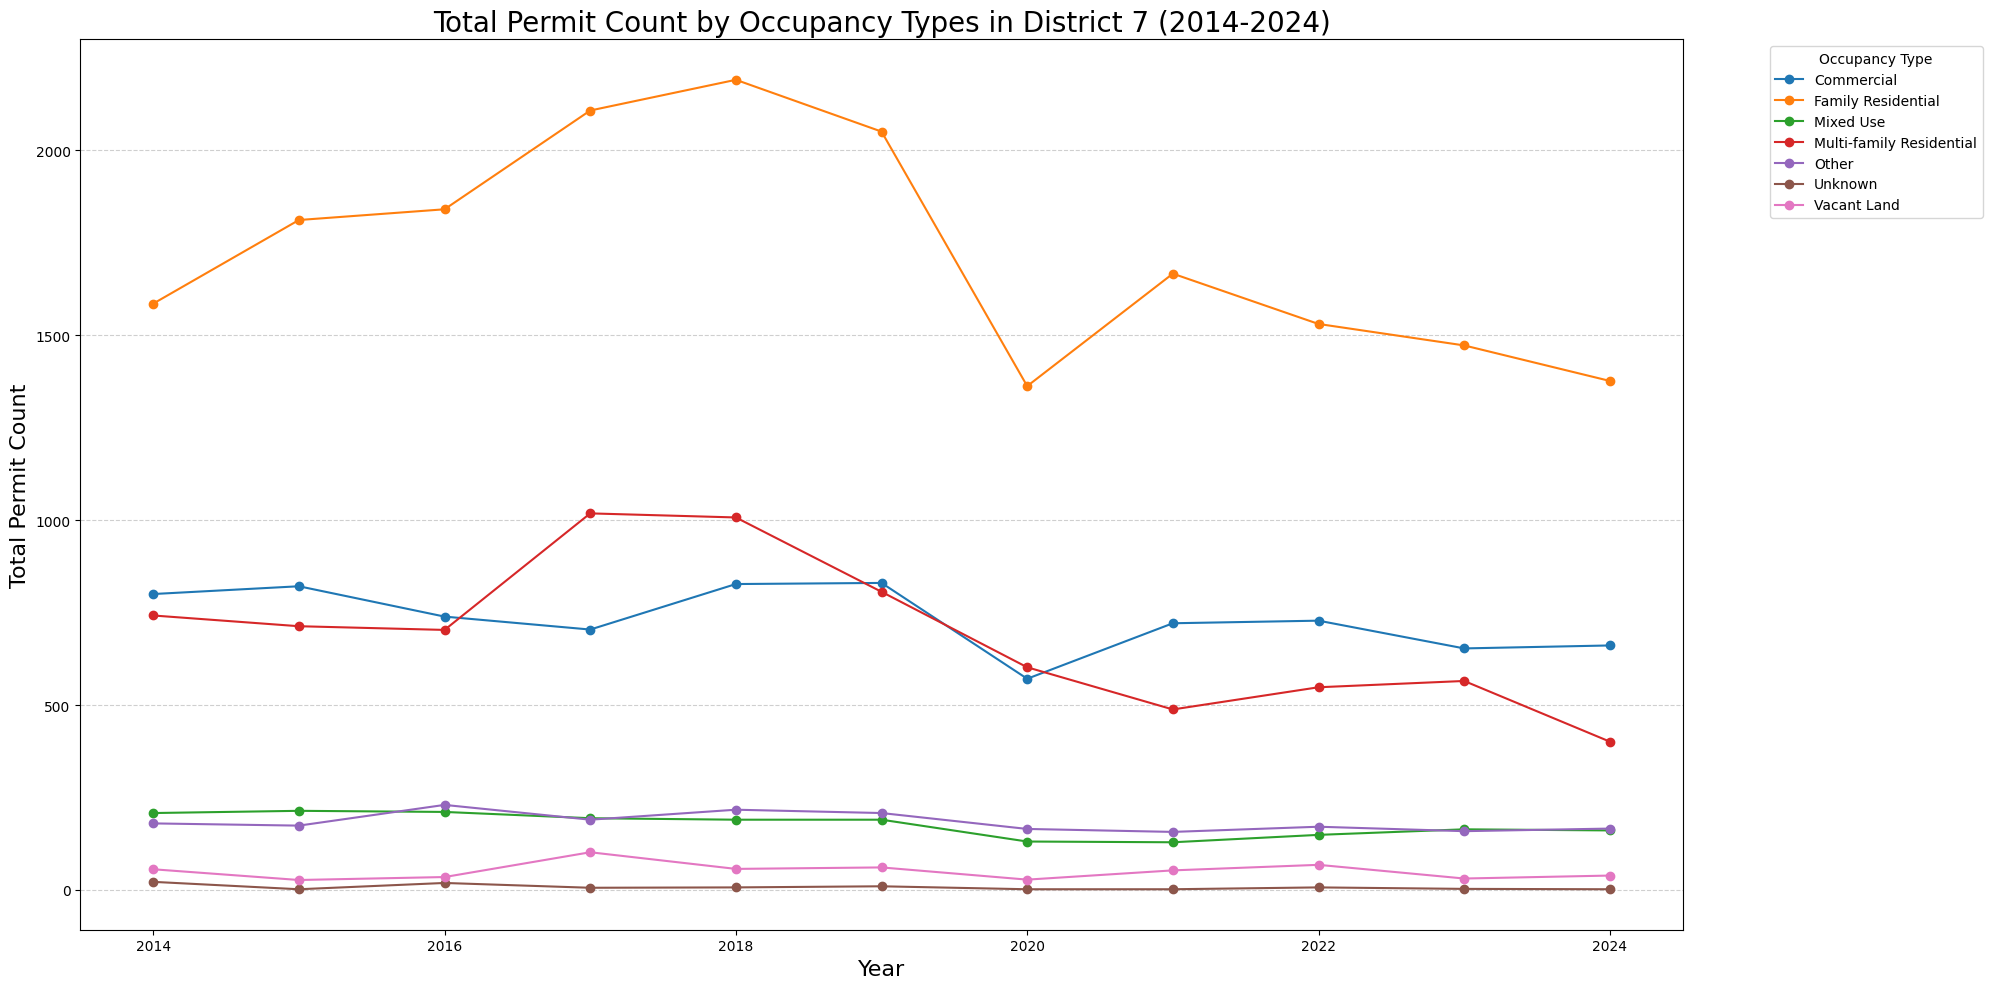

In [50]:
occupancytype_count = df_d7.groupby(['issued_year', 'new_occupancytype_category']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
occupancytype_count.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Occupancy Types in District 7 (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Findings**: 
- All occupancy types are decreasing or remaining relatively the same since 2023. 
- The most common occupancy type is a family of 1 to 2.
- Family of 1-3, 1-4, and 1 unit are common occupancy types as well.

#### Total Permit Count by Status in Boston (2014-2024)

<Figure size 1200x600 with 0 Axes>

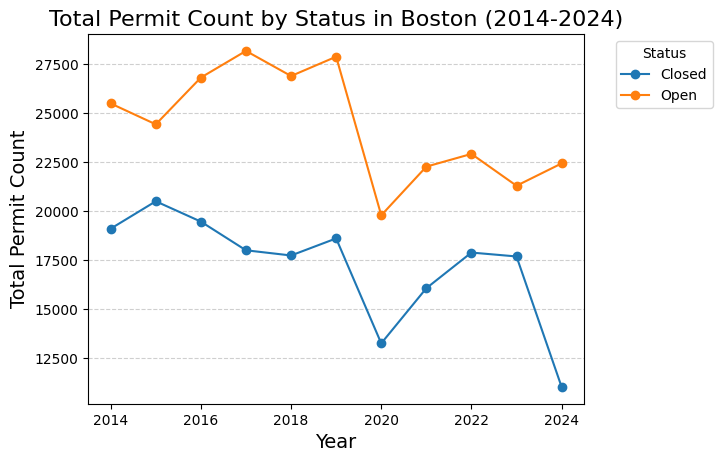

In [76]:
status_count = df_boston.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
status_count.plot(kind='line', marker='o', linestyle='-')

plt.title('Total Permit Count by Status in Boston (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Permit Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Total Permit Count by Status in District 7 (2014-2024)

<Figure size 1200x600 with 0 Axes>

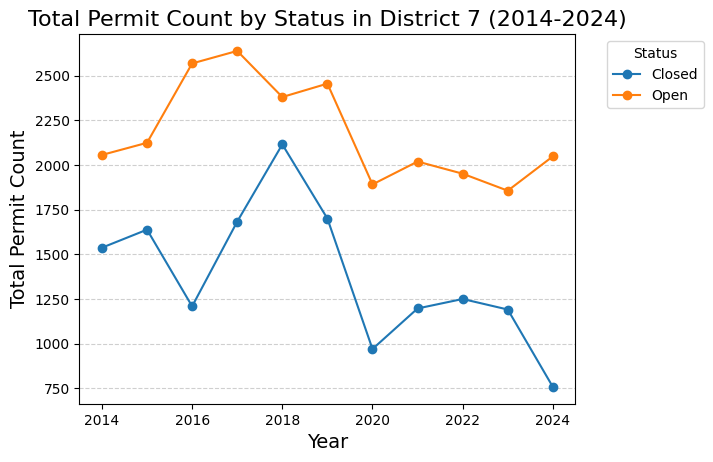

In [78]:
status_count = df_d7.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
status_count.plot(kind='line', marker='o', linestyle='-')

plt.title('Total Permit Count by Status in District 7 (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Permit Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Findings**: 
- Open Permits are higher than Closed Permits from 2010 to 2024. 

#### Percentage of Permit by Status in Boston (2014-2024)

<Figure size 1200x600 with 0 Axes>

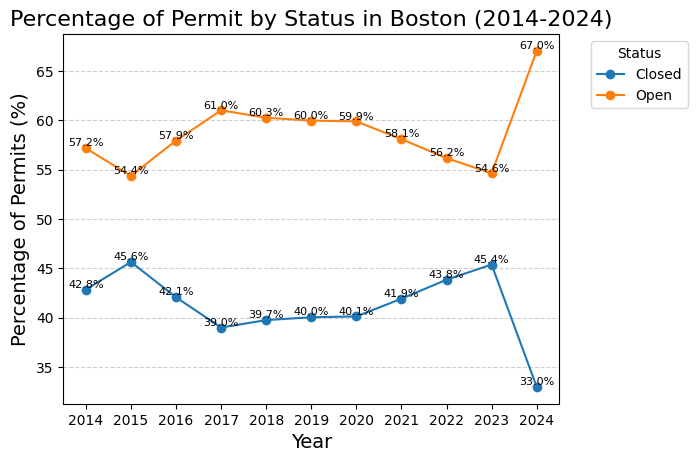

In [77]:
status_count = df_boston.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

status_percent = status_count.div(status_count.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
status_percent.plot(kind='line', marker='o', linestyle='-')

for year in status_percent.index:
    for status in status_percent.columns:
        plt.text(year, status_percent.loc[year, status], 
                 f"{status_percent.loc[year, status]:.1f}%", 
                 ha='center', va='bottom', fontsize=8)

plt.title('Percentage of Permit by Status in Boston (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=status_percent.index, labels=status_percent.index.astype(int), rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Percentage of Permit by Status in District 7 (2014-2024)

<Figure size 1200x600 with 0 Axes>

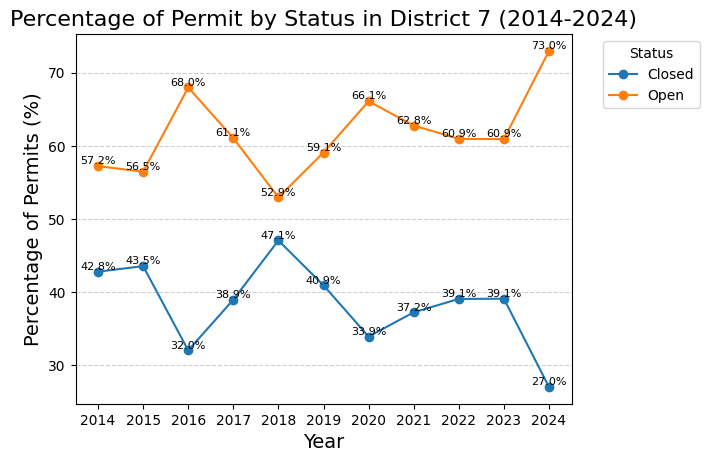

In [79]:
status_count = df_d7.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

status_percent = status_count.div(status_count.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
status_percent.plot(kind='line', marker='o', linestyle='-')

for year in status_percent.index:
    for status in status_percent.columns:
        plt.text(year, status_percent.loc[year, status], 
                 f"{status_percent.loc[year, status]:.1f}%", 
                 ha='center', va='bottom', fontsize=8)

plt.title('Percentage of Permit by Status in District 7 (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=status_percent.index, labels=status_percent.index.astype(int), rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Findings**: 
- Open Permits were gradually decreasing from 2021 to 2023, but began increasing afterward. 
- In contrast, Closed Permits were slightly increasing from 2021 to 2023, but started decreasing afterward. 

### 5. Conclusion

- Electrical, Plumbing & Utility Systems and Renovation and Interior/Exterior Work are the most common work of building permits.
- Construction and New Installations as well as Fire Protection and Safety should be closely monitored to prevent larger issues occured.
- All occupancy types are decreasing or remaining relatively the same since 2023.
- 75% of the permits remain open, which is significantly higher compared to the years before. 